<a href="https://colab.research.google.com/github/kitarp07/cifar10_cnn/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [ ]:

 (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
y_train = y_train.astype("float32")

y_test = y_test.astype("float32")


In [ ]:
x_train.min(), x_train.max()

(0.0, 255.0)

In [ ]:
x_train = x_train/ 255.0
x_test = x_test/255.0

In [ ]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np


In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

'automobile'

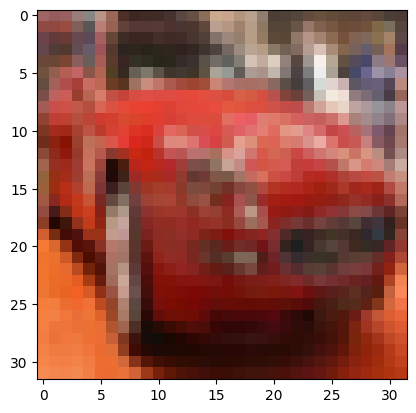

In [ ]:
index = 5
plt.imshow(x_train[index
])
y_train_temp = y_train.astype(int)
y_train_temp = np.squeeze(y_train_temp)

classes[y_train_temp[index]]

In [ ]:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', kernel_regularizer = tf.keras.regularizers.l2(0.01), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16, 3,kernel_regularizer = tf.keras.regularizers.l2(0.01),  activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, padding='same',kernel_regularizer = tf.keras.regularizers.l2(0.01), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, kernel_regularizer = tf.keras.regularizers.l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.002),
    metrics=["accuracy"]
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 2.1488 - accuracy: 0.2737 - val_loss: 1.8636 - val_accuracy: 0.3579
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8004 - accuracy: 0.3953 - val_loss: 2.1885 - val_accuracy: 0.2961
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.7471 - accuracy: 0.4179 - val_loss: 1.6561 - val_accuracy: 0.4774
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.7290 - accuracy: 0.4339 - val_loss: 1.9007 - val_accuracy: 0.4077
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.7131 - accuracy: 0.4395 - val_loss: 2.1601 - val_accuracy: 0.3645
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.7102 - accuracy: 0.4441 - val_loss: 1.5350 - val_accuracy: 0.5260
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.6960 - accuracy: 0.4475 - val_loss: 1.4903 -

<Axes: >

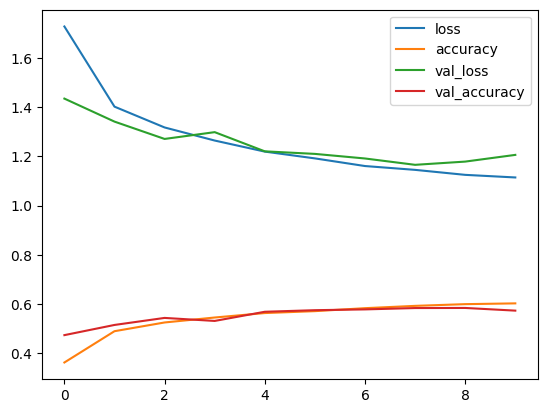

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

In [ ]:
# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.xlabel(" learning rate")
# plt.ylabel("loss")
# plt.title(" lr vs loss ")

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3,padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, 3, padding='same',   activation='relu'),
    tf.keras.layers.Conv2D(32, 3, padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same',  activation='relu'),
    tf.keras.layers.Conv2D(32, 3, padding='same',  activation='relu'),

    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))


history2 = model2.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 149s 94ms/step - loss: 1.6186 - accuracy: 0.4040
Epoch 2/30
1563/1563 [==============================] - 147s 94ms/step - loss: 1.1580 - accuracy: 0.5844
Epoch 3/30
1563/1563 [==============================] - 146s 93ms/step - loss: 0.9747 - accuracy: 0.6536
Epoch 4/30
1563/1563 [==============================] - 148s 95ms/step - loss: 0.8702 - accuracy: 0.6908
Epoch 5/30
1563/1563 [==============================] - 150s 96ms/step - loss: 0.7935 - accuracy: 0.7188
Epoch 6/30
1563/1563 [==============================] - 148s 95ms/step - loss: 0.7322 - accuracy: 0.7418
Epoch 7/30
1563/1563 [==============================] - 146s 93ms/step - loss: 0.6838 - accuracy: 0.7600
Epoch 8/30
1563/1563 [==============================] - 147s 94ms/step - loss: 0.6466 - accuracy: 0.7712
Epoch 9/30
1563/1563 [==============================] - 146s 93ms/step - loss: 0.6104 - accuracy: 0.7856
Epoch 10/30
1563/1563 [==============================] 

In [ ]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 1.1073 - accuracy: 0.7328


[1.1072711944580078, 0.7328000068664551]

In [ ]:
y_probs = model2.predict(x_test)

313/313 [==============================] - 7s 23ms/step


In [ ]:
y_probs[0], tf.argmax(y_probs[0])

(array([1.55529135e-03, 1.12051405e-02, 1.18813268e-03, 4.26128566e-01,
        4.35641006e-04, 5.47382474e-01, 9.65870917e-03, 1.30756875e-04,
        2.02639028e-03, 2.88823241e-04], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>)

In [ ]:
y_preds = y_probs.argmax(axis=1)

In [ ]:
y_probs[0], y_preds[0]

(array([1.55529135e-03, 1.12051405e-02, 1.18813268e-03, 4.26128566e-01,
        4.35641006e-04, 5.47382474e-01, 9.65870917e-03, 1.30756875e-04,
        2.02639028e-03, 2.88823241e-04], dtype=float32),
 5)

<Axes: >

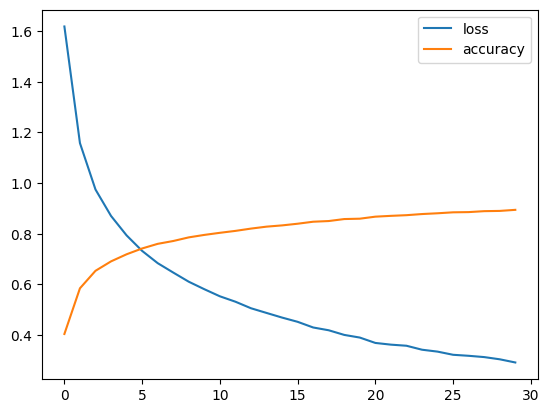

In [ ]:
import pandas as pd

pd.DataFrame(history2.history).plot()

In [ ]:
import random

def plot_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  y_probs = model.predict(target_image.reshape(1, 32,32,3))
  y_preds = y_probs.argmax()

  pred_label = classes[y_probs.argmax()]
  tt = np.squeeze(true_labels)
  tt = tt.astype("int")
  true_label = classes[tt[i]]

  plt.imshow(target_image)

  if pred_label == true_label:
    color="green"
  else:
    color = "red"

  plt.xlabel("Pred: {} True: {}".format(pred_label, true_label), color=color)



1/1 [==============================] - 0s 17ms/step


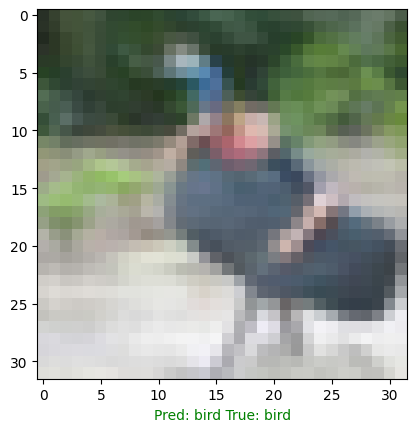

In [ ]:
plot_image(model = model2, images = x_test, true_labels=y_test, classes=classes)